# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.5.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

total_movies = len(movies)
total_movies


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


244914

In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'])


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
# Drop rows with missing 'title' values
movies = movies.dropna(subset=['title'])

# Filter for movies containing 'Batman' in their title (case-insensitive)
batman_df = movies[movies['title'].str.contains('Batman', case=False)]

# Print the total number of Batman movies and display the first 10 rows
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)


Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
# You can filter the 'movies' DataFrame to get the 'Harry Potter' movies and then sort them by the 'year' column.
harry_potter_movies = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_movies_sorted = harry_potter_movies.sort_values(by=['year'], ascending=False)
harry_potter_movies_sorted


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
# You can use the len() function with a condition to count movies made in the year 2015.
movies_2015 = len(movies[movies.year == 2015])
movies_2015


8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
# You can use the len() function with a range of years to count movies made between 2000 and 2018.
movies_2000_to_2018 = len(movies[(movies.year >= 2000) & (movies.year <= 2018)])
movies_2000_to_2018


114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
# You can use the len() function with a condition to count movies titled "Hamlet."
hamlet_movies = len(movies[movies.title == "Hamlet"])
hamlet_movies


20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
# You can filter the 'movies' DataFrame to get movies titled "Hamlet" and released on or after 2000, then sort by 'year'.
hamlet_movies_2000 = movies[(movies.title == "Hamlet") & (movies.year >= 2000)]
hamlet_movies_2000_sorted = hamlet_movies_2000.sort_values(by=['year'])
hamlet_movies_2000_sorted


,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
# You can filter the 'cast' DataFrame to get roles in the movie "Inception" with NaN 'n' values (supporting cast).
inception_supporting_roles = len(cast[(cast.title == "Inception") & (cast.n.isna())])
inception_supporting_roles


27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
# You can filter the 'cast' DataFrame to get roles in the movie "Inception" with NaN 'n' values (supporting cast).
inception_supporting_roles = len(cast[(cast.title == "Inception") & (cast.n.isna())])
inception_supporting_roles


27

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
# You can filter the 'cast' DataFrame to get roles in the movie "Inception" with non-NaN 'n' values (main cast).
inception_main_roles = len(cast[(cast.title == "Inception") & (~cast.n.isna())])
inception_main_roles


51

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
# Filter the 'cast' DataFrame for movies where there is a character named 'Albus Dumbledore.'
albus_dumbledore_movies = cast[cast['character'] == 'Albus Dumbledore']

# Display the list of movies where the character 'Albus Dumbledore' appears.
albus_dumbledore_movies[['title', 'year']]


,title,year
704984,Epic Movie,2007
792421,Harry Potter and the Goblet of Fire,2005
792423,Harry Potter and the Order of the Phoenix,2007
792424,Harry Potter and the Prisoner of Azkaban,2004
947789,Harry Potter and the Chamber of Secrets,2002
947790,Harry Potter and the Sorcerer's Stone,2001
1685537,Ultimate Hero Project,2013
2248085,Potter,2015


In [23]:
# Filter the 'cast' DataFrame for actors who played the character 'Albus Dumbledore.'
actors_as_albus_dumbledore = albus_dumbledore_movies.drop_duplicates(subset=['name'])

# Display the list of actors who played the character 'Albus Dumbledore' and the movies they appeared in.
actors_as_albus_dumbledore[['name', 'title', 'year']]


,name,title,year
704984,Dane Farwell,Epic Movie,2007
792421,Michael Gambon,Harry Potter and the Goblet of Fire,2005
947789,Richard Harris,Harry Potter and the Chamber of Secrets,2002
1685537,George (X) O'Connor,Ultimate Hero Project,2013
2248085,Timothy Tedmanson,Potter,2015


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
# Filter the 'cast' DataFrame for roles played by 'Keanu Reeves.'
keanu_reeves_roles = cast[cast['name'] == 'Keanu Reeves']

# Count the total number of roles played by 'Keanu Reeves' throughout his career.
total_roles_by_keanu_reeves = len(keanu_reeves_roles)
total_roles_by_keanu_reeves



62

In [25]:
# Filter the 'cast' DataFrame for leading roles played by 'Keanu Reeves' on or after 1999.
leading_roles_keanu_reeves_after_1999 = keanu_reeves_roles[(keanu_reeves_roles['n'].isin([1, 2, 3])) & (keanu_reeves_roles['year'] >= 1999)]

# Sort the filtered DataFrame by year.
leading_roles_keanu_reeves_sorted = leading_roles_keanu_reeves_after_1999.sort_values(by='year')

# Display the list of leading roles played by 'Keanu Reeves' on or after 1999 in order by year.
leading_roles_keanu_reeves_sorted[['year', 'title']]


,year,title
1892390,1999,The Matrix
1892397,2000,The Replacements
1892387,2000,The Gift
1892398,2000,The Watcher
1892358,2001,Hard Ball
1892383,2001,Sweet November
1892379,2003,Something's Gotta Give
1892348,2005,Constantine
1892388,2006,The Lake House
1892385,2008,The Day the Earth Stood Still


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
# Filter the 'cast' DataFrame for roles from 1950 to 1960.
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)]

# Group the roles by 'type' (actor or actress) and count the number of roles for each type.
roles_1950s_count = roles_1950s['type'].value_counts()

# Display the total number of actor and actress roles available in the 1950s.
roles_1950s_count



actor      171302
actress     63333
Name: type, dtype: int64

In [27]:
# Filter the 'cast' DataFrame for roles from 2007 to 2017.
roles_2007_2017 = cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)]

# Group the roles by 'type' (actor or actress) and count the number of roles for each type.
roles_2007_2017_count = roles_2007_2017['type'].value_counts()

# Display the total number of actor and actress roles available from 2007 to 2017.
roles_2007_2017_count


actor      922782
actress    529631
Name: type, dtype: int64

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [28]:
# You can filter the 'cast' DataFrame for leading roles (where 'n' is 1) from 2000 to the present.
leading_roles_2000_present = len(cast[(cast.n == 1) & (cast.year >= 2000)])
leading_roles_2000_present


60568

In [29]:
# You can filter the 'cast' DataFrame for non-leading roles (where 'n' is not 1) from 2000 to the present.
non_leading_roles_2000_present = len(cast[(cast.n != 1) & (cast.year >= 2000)])
non_leading_roles_2000_present


1889194

In [30]:
# You can filter the 'cast' DataFrame for support/extra-credit roles (where 'n' is NaN) from 2000 to the present.
support_roles_2000_present = len(cast[(cast.n.isna()) & (cast.year >= 2000)])
support_roles_2000_present


887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<Axes: >

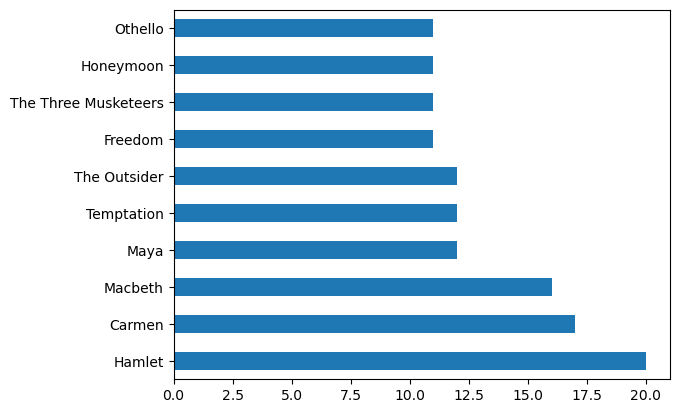

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:

# Filter the 'movies' DataFrame for movies released in the 2000s.
movies_2000s = movies[(movies.year >= 2000) & (movies.year <= 2009)]

# Count the number of movies released in each year and get the top 3.
top_3_years_2000s = movies_2000s['year'].value_counts().head(3)
top_3_years_2000s


2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<Axes: title={'center': 'Number of Films Released per Decade'}, xlabel='Decade', ylabel='Number of Films'>

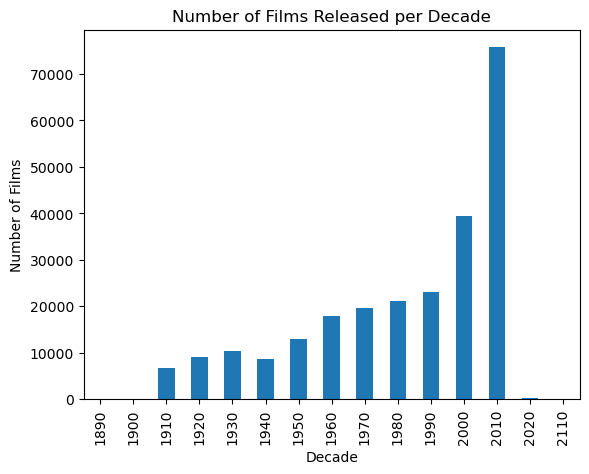

In [34]:
# Create a new column 'decade' that represents the decade for each movie.
movies['decade'] = (movies['year'] // 10) * 10

# Group the movies by decade and count the number of movies in each decade.
movies_per_decade = movies.groupby('decade')['title'].count()

# Plot the total number of films released per-decade.
movies_per_decade.plot(kind='bar', xlabel='Decade', ylabel='Number of Films', title='Number of Films Released per Decade')


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
# Count the occurrences of each character name in the 'cast' DataFrame and get the top 10.
top_10_common_characters = cast['character'].value_counts().head(10)
top_10_common_characters


Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [36]:
# Filter the 'cast' DataFrame for roles where 'character' is "Herself" and count the occurrences of each person.
herself_roles = cast[cast.character == "Herself"]
top_10_herself_actors = herself_roles['name'].value_counts().head(10)
top_10_herself_actors


Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [37]:
# Filter the 'cast' DataFrame for roles where 'character' is "Himself" and count the occurrences of each person.
himself_roles = cast[cast.character == "Himself"]
top_10_himself_actors = himself_roles['name'].value_counts().head(10)
top_10_himself_actors


Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [38]:
# For Summer movies plot
summer_movies_usa.loc[:, 'month'] = summer_movies_usa['date'].dt.month

# For Action movies plot
action_movies_usa.loc[:, 'week'] = action_movies_usa['date'].dt.isocalendar().week

# Filter out rows with NaN values in the 'character' column
cast = cast.dropna(subset=['character'])

# Convert the 'character' column to lowercase and check for roles starting with "zombie"
zombie_roles = cast[cast['character'].str.lower().str.startswith("zombie")]



NameError: name 'summer_movies_usa' is not defined

In [ ]:
# Convert the 'character' column to lowercase and check for roles starting with "police"
police_roles = cast[cast['character'].str.lower().str.startswith("police")]

# Count the occurrences of each role and get the top 10
top_10_police_roles = police_roles['character'].value_counts().head(10)
top_10_police_roles



character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: count, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

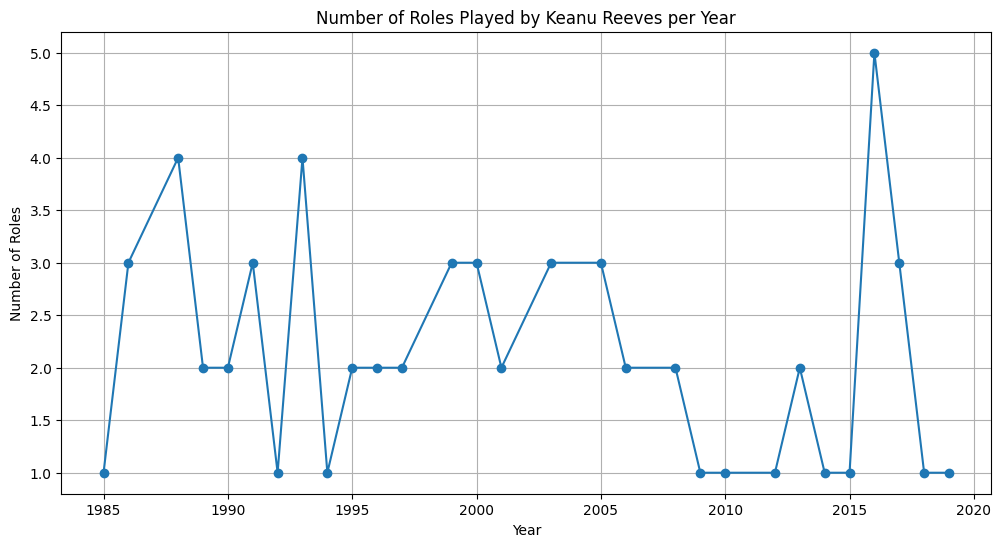

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'cast' DataFrame for 'Keanu Reeves' roles.
keanu_reeves_roles = cast[cast['name'] == 'Keanu Reeves']

# Group the roles by the year and count the number of roles per year.
roles_per_year = keanu_reeves_roles.groupby('year')['character'].count()

# Plot the number of roles per year.
plt.figure(figsize=(12, 6))
plt.plot(roles_per_year.index, roles_per_year.values, marker='o', linestyle='-')
plt.title('Number of Roles Played by Keanu Reeves per Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(True)
plt.show()


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


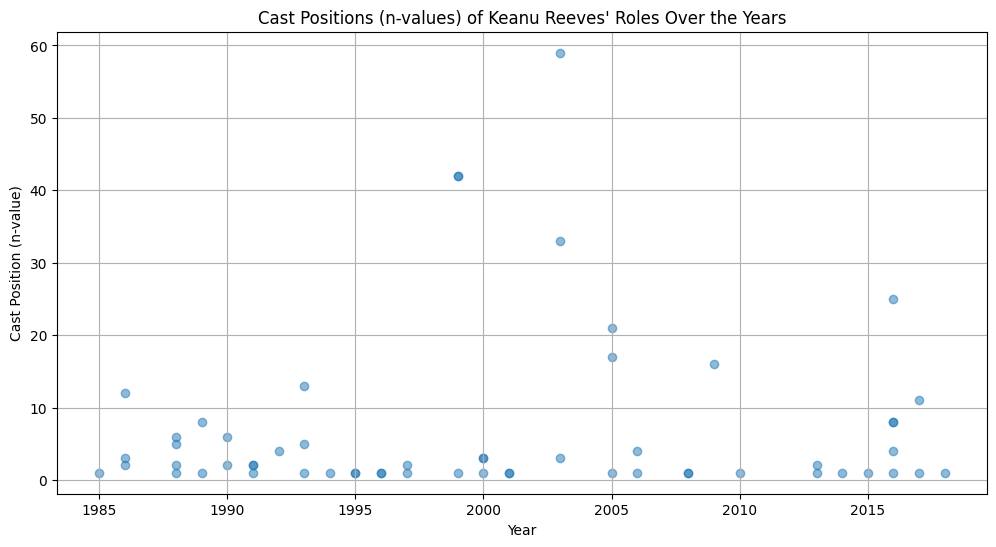

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'cast' DataFrame for 'Keanu Reeves' roles.
keanu_reeves_roles = cast[cast['name'] == 'Keanu Reeves']

# Drop rows with NaN values in the 'n' column, as we want to plot cast positions.
keanu_reeves_roles = keanu_reeves_roles.dropna(subset=['n'])

# Create a scatter plot to show cast positions (n-values) over the years.
plt.figure(figsize=(12, 6))
plt.scatter(keanu_reeves_roles['year'], keanu_reeves_roles['n'], marker='o', alpha=0.5)
plt.title('Cast Positions (n-values) of Keanu Reeves\' Roles Over the Years')
plt.xlabel('Year')
plt.ylabel('Cast Position (n-value)')
plt.grid(True)
plt.show()


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

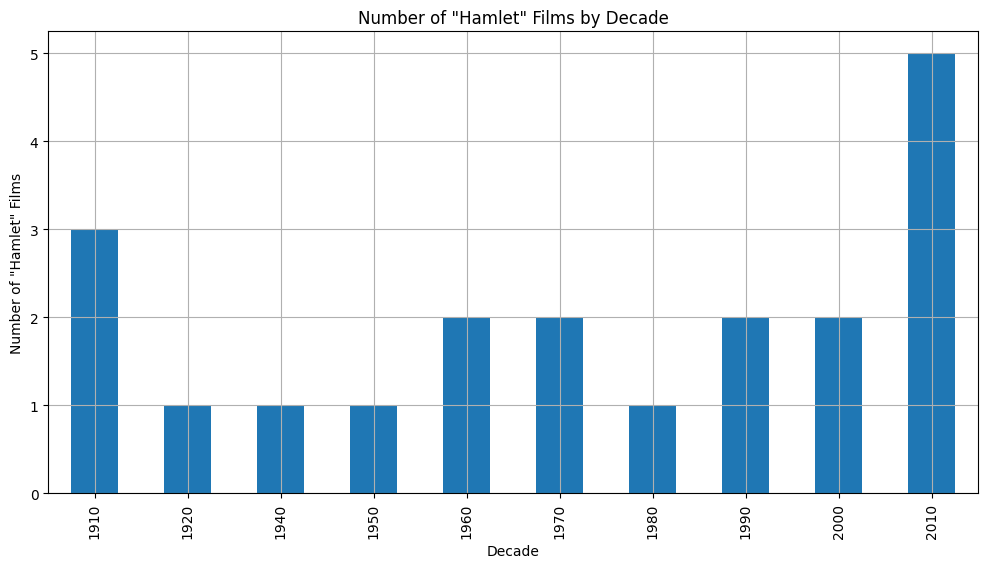

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'movies' DataFrame for movies with the title "Hamlet."
hamlet_movies = movies[movies['title'] == 'Hamlet']

# Create a new column 'decade' that represents the decade for each movie.
hamlet_movies.loc[:, 'decade'] = (hamlet_movies['year'] // 10) * 10

# Group the "Hamlet" movies by decade and count the number of movies in each decade.
hamlet_movies_per_decade = hamlet_movies.groupby('decade')['title'].count()

# Plot the number of "Hamlet" films made by each decade.
plt.figure(figsize=(12, 6))
hamlet_movies_per_decade.plot(kind='bar', xlabel='Decade', ylabel='Number of "Hamlet" Films', title='Number of "Hamlet" Films by Decade')
plt.grid(True)
plt.show()



### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [ ]:
# Filter the 'cast' DataFrame for roles in the 1960s and where 'n' is in [1, 2, 3].
leading_roles_1960s = cast[(cast['year'] >= 1960) & (cast['year'] <= 1969) & (cast['n'].isin([1, 2, 3]))]

# Count the number of leading roles.
number_of_leading_roles_1960s = len(leading_roles_1960s)
number_of_leading_roles_1960s


32610

In [ ]:
# Filter the 'cast' DataFrame for roles in the 2000s and where 'n' is in [1, 2, 3].
leading_roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & (cast['n'].isin([1, 2, 3]))]

# Count the number of leading roles.
number_of_leading_roles_2000s = len(leading_roles_2000s)
number_of_leading_roles_2000s


74424

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [ ]:
# Filter the 'cast' DataFrame for roles played by 'Frank Oz.'
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the roles by movie title and count the number of roles in each movie.
roles_per_movie = frank_oz_roles.groupby(['year', 'title'])['character'].count().reset_index()

# Filter movies where Frank Oz played more than one role.
movies_with_multiple_roles = roles_per_movie[roles_per_movie['character'] > 1]

# Sort the movies by year.
movies_with_multiple_roles_sorted = movies_with_multiple_roles.sort_values(by='year')

# Display the list of movies in which Frank Oz played more than one role in order by year.
movies_with_multiple_roles_sorted[['year', 'title', 'character']]


,year,title,character
0,1979,The Muppet Movie,8
3,1981,An American Werewolf in London,2
4,1981,The Great Muppet Caper,6
5,1982,The Dark Crystal,2
9,1984,The Muppets Take Manhattan,7
10,1985,Follow That Bird,3
14,1992,The Muppet Christmas Carol,7
15,1996,Muppet Treasure Island,4
17,1999,Muppets from Space,4
19,1999,The Adventures of Elmo in Grouchland,3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [ ]:
# Filter the 'cast' DataFrame for roles played by 'Frank Oz.'
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the roles by character name and count the number of times each character was portrayed by Frank Oz.
character_counts = frank_oz_roles['character'].value_counts()

# Filter characters that were portrayed at least twice.
characters_portrayed_at_least_twice = character_counts[character_counts >= 2]

# Display the list of characters portrayed by Frank Oz at least twice.
characters_portrayed_at_least_twice


character
Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: count, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: xlabel='date'>

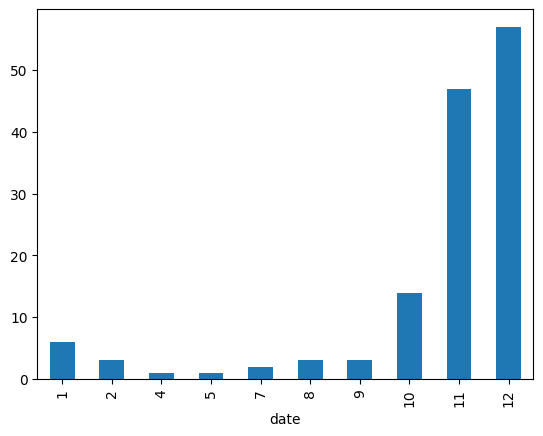

In [ ]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

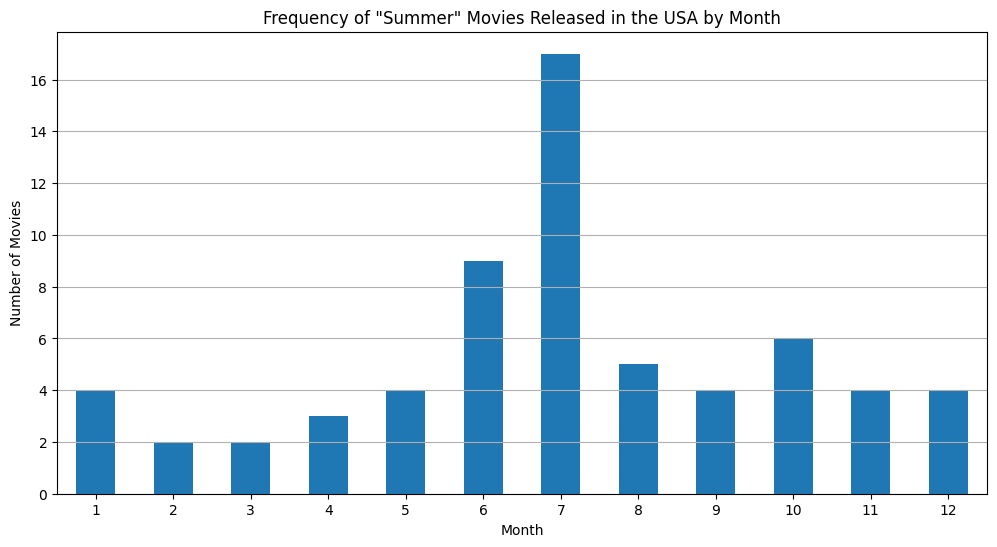

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'release_dates' DataFrame for movies with "Summer" in their title released in the USA.
summer_movies_usa = release_dates[(release_dates['title'].str.contains('Summer')) & (release_dates['country'] == 'USA')]

# Create a copy of the 'summer_movies_usa' DataFrame and then extract the month.
summer_movies_usa_copy = summer_movies_usa.copy()
summer_movies_usa_copy['month'] = summer_movies_usa_copy['date'].dt.month

# Count the number of movies for each month.
movie_count_by_month = summer_movies_usa_copy['month'].value_counts().sort_index()

# Plot the frequency of movies with "Summer" in their title by month.
plt.figure(figsize=(12, 6))
movie_count_by_month.plot(kind='bar', xlabel='Month', ylabel='Number of Movies', title='Frequency of "Summer" Movies Released in the USA by Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

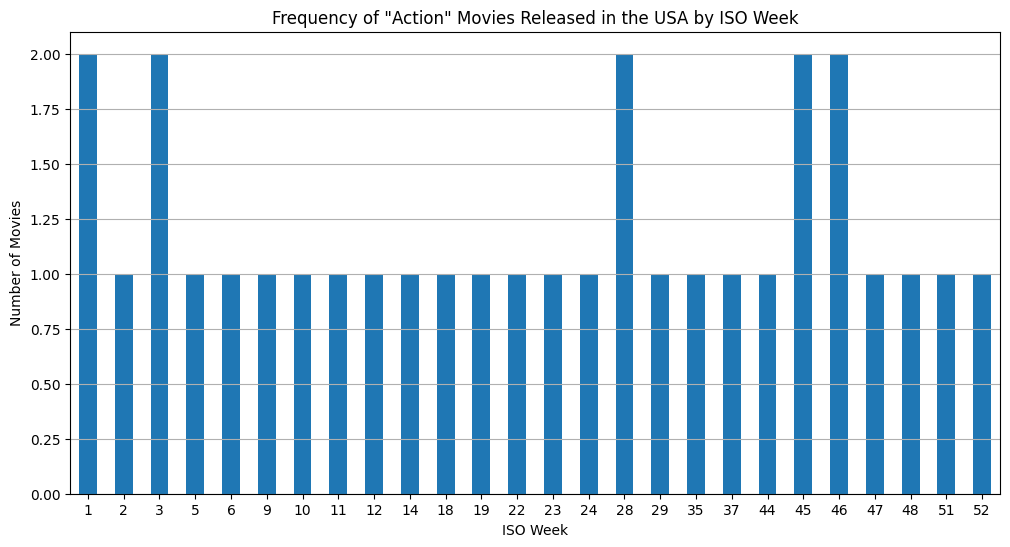

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'release_dates' DataFrame for movies with "Action" in their title released in the USA.
action_movies_usa = release_dates[(release_dates['title'].str.contains('Action')) & (release_dates['country'] == 'USA')]

# Create a copy of the 'action_movies_usa' DataFrame and then extract the ISO week.
action_movies_usa_copy = action_movies_usa.copy()
action_movies_usa_copy['iso_week'] = action_movies_usa_copy['date'].dt.isocalendar().week

# Count the number of movies for each ISO week.
movie_count_by_week = action_movies_usa_copy['iso_week'].value_counts().sort_index()

# Plot the frequency of movies with "Action" in their title by ISO week.
plt.figure(figsize=(12, 6))
movie_count_by_week.plot(kind='bar', xlabel='ISO Week', ylabel='Number of Movies', title='Frequency of "Action" Movies Released in the USA by ISO Week')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [ ]:
 # Filter the 'cast' DataFrame for roles where 'Keanu Reeves' is in the lead (n = 1, 2, or 3).
keanu_lead_roles = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'].isin([1, 2, 3]))]

# Merge the 'keanu_lead_roles' DataFrame with the 'release_dates' DataFrame on the movie title.
keanu_lead_movies = keanu_lead_roles.merge(release_dates, on='title')

# Filter for movies released in the USA.
keanu_lead_usa_movies = keanu_lead_movies[keanu_lead_movies['country'] == 'USA']

# Sort the DataFrame by the release date in the USA.
keanu_lead_usa_movies_sorted = keanu_lead_usa_movies.sort_values(by='date')

# Display the movies in which Keanu Reeves played the lead role along with their release date.
keanu_lead_usa_movies_sorted[['title', 'date']]


,title,date
603,Speed,1922-10-22
605,Speed,1936-05-08
679,Sweet November,1968-02-08
553,River's Edge,1987-05-08
941,The Night Before,1988-04-15
78,Bill & Ted's Excellent Adventure,1989-02-17
1018,Tune in Tomorrow...,1990-11-02
468,Point Break,1991-07-12
69,Bill & Ted's Bogus Journey,1991-07-19
435,Little Buddha,1994-05-25


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

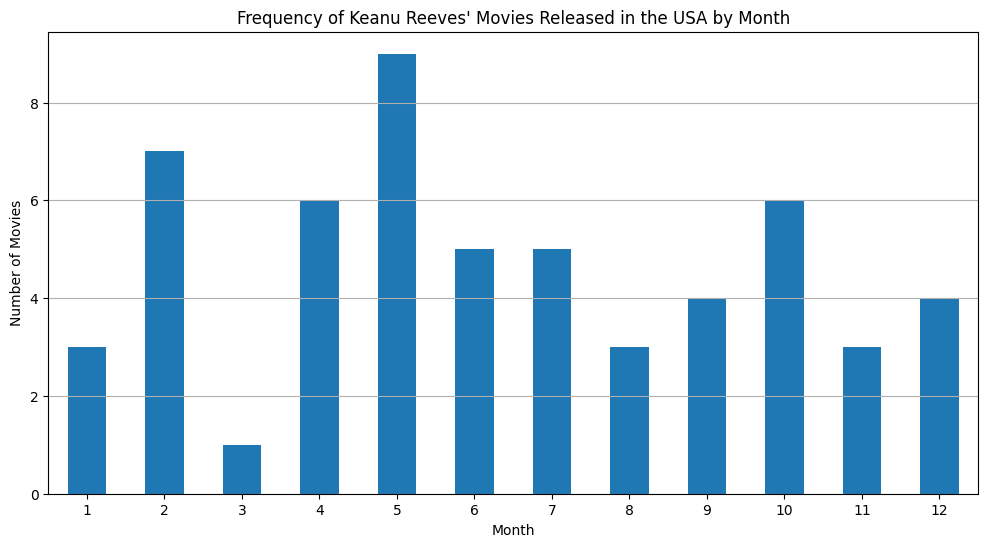

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'cast' DataFrame for roles played by 'Keanu Reeves.'
keanu_reeves_roles = cast[cast['name'] == 'Keanu Reeves']

# Merge the 'keanu_reeves_roles' DataFrame with the 'release_dates' DataFrame on the movie title.
keanu_reeves_movies = keanu_reeves_roles.merge(release_dates, on='title')

# Filter for movies released in the USA.
keanu_reeves_usa_movies = keanu_reeves_movies[keanu_reeves_movies['country'] == 'USA']

# Create a copy of the 'keanu_reeves_usa_movies' DataFrame and then extract the month.
keanu_reeves_usa_movies_copy = keanu_reeves_usa_movies.copy()
keanu_reeves_usa_movies_copy['month'] = keanu_reeves_usa_movies_copy['date'].dt.month

# Count the number of movies for each month.
movie_count_by_month = keanu_reeves_usa_movies_copy['month'].value_counts().sort_index()

# Plot the frequency of Keanu Reeves' movies released in the USA by month.
plt.figure(figsize=(12, 6))
movie_count_by_month.plot(kind='bar', xlabel='Month', ylabel='Number of Movies', title='Frequency of Keanu Reeves\' Movies Released in the USA by Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

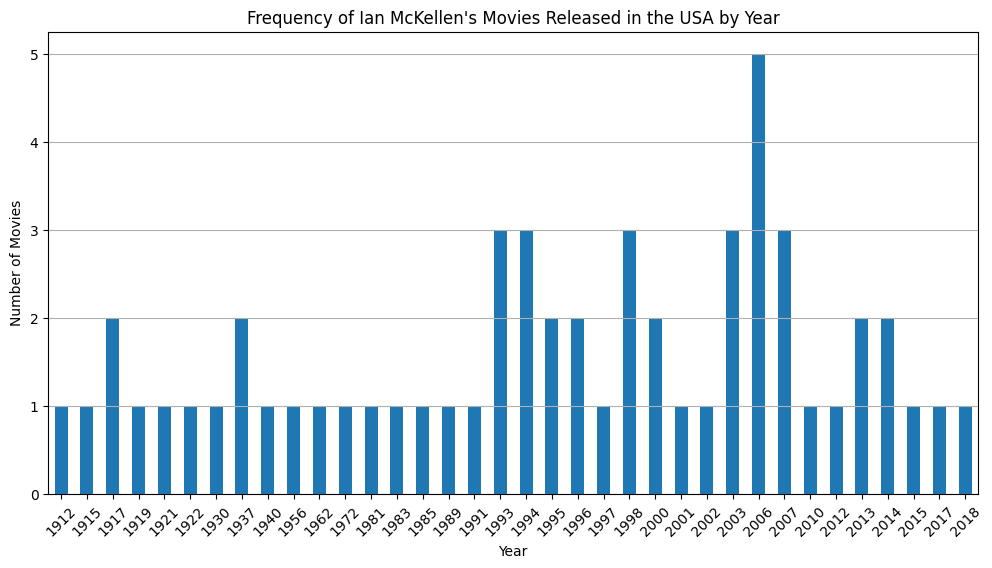

In [ ]:
import matplotlib.pyplot as plt

# Filter the 'cast' DataFrame for roles played by 'Ian McKellen.'
ian_mckellen_roles = cast[cast['name'] == 'Ian McKellen']

# Merge the 'ian_mckellen_roles' DataFrame with the 'release_dates' DataFrame on the movie title.
ian_mckellen_movies = ian_mckellen_roles.merge(release_dates, on='title')

# Filter for movies released in the USA.
ian_mckellen_usa_movies = ian_mckellen_movies[ian_mckellen_movies['country'] == 'USA']

# Create a copy of the 'ian_mckellen_usa_movies' DataFrame and then extract the year.
ian_mckellen_usa_movies_copy = ian_mckellen_usa_movies.copy()
ian_mckellen_usa_movies_copy['year'] = ian_mckellen_usa_movies_copy['date'].dt.year

# Count the number of movies for each year.
movie_count_by_year = ian_mckellen_usa_movies_copy['year'].value_counts().sort_index()

# Plot the frequency of Ian McKellen's movies released in the USA by year.
plt.figure(figsize=(12, 6))
movie_count_by_year.plot(kind='bar', xlabel='Year', ylabel='Number of Movies', title='Frequency of Ian McKellen\'s Movies Released in the USA by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

